### 查看GPU版本 smi:system management interface

In [ ]:
! /opt/bin/nvidia-smi

In [5]:
#导入所使用的包
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

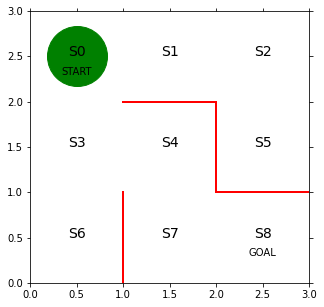

In [6]:
#迷宫的初始位置

#声明图的大小以及图的变量名
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

#画出红色的墙壁
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

#画出表示状态的文字S0-S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

#设定画图的范围
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

#当前位置S0用绿色圆圈画出
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [7]:
#设定参数θ的初始值theta_0，用于确定初始方案

#行为状态0-7，列为↑，→，↓，←表示的移动方向
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8是目标，无策略
                    ])

In [8]:
#将策略参数θ转换为行动策略π的函数定义
def simple_convert_into_pi_from_theta(theta):
    #简单地计算百分比

    [m, n] = theta.shape  # 获取θ的矩阵大小
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 计算百分比

    pi = np.nan_to_num(pi)  # 将nan转换为0

    return pi

In [9]:
#求初始策略π
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [10]:
#初始策略用pi_0表示
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [11]:
#1步移动后求得状态s的函数的定义

def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # 根据概率pi[s,:]选择direction

    if next_direction == "up":
        s_next = s - 3  # 向上移动时状态的数字减少3
    elif next_direction == "right":
        s_next = s + 1  # 向右移动时状态的数字增加1
    elif next_direction == "down":
        s_next = s + 3  # 向下移动时状态的数字增加3
    elif next_direction == "left":
        s_next = s - 1  # 向左移动时状态的数字减少1

    return s_next


In [12]:
# 迷宫内使智能体移动到目标的函数的定义

def goal_maze(pi):
    s = 0  # 开始地点
    state_history = [0]  # 记录智能体移动轨迹的列表

    while (1):  # 循环，直到到达目标
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 在记录列表中添加下一个状态（智能体的位置）

        if next_s == 8:  # 到达目标地点则终止
            break
        else:
            s = next_s

    return state_history

In [13]:
# 在迷宫内朝着目标移动

state_history = goal_maze(pi_0)


In [17]:
print(state_history)
print("求解迷宫路径所需的步数是 " + str(len(state_history) - 1))

[0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 5, 2, 1, 0, 3, 4, 7, 4, 7, 8]
求解迷宫路径所需的步数是 28


In [18]:
# 将智能体移动的情形可视化
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''初始化背景图像'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''每一帧的画面内容'''
    state = state_history[i]  # 画出当前的位置
    x = (state % 3) + 0.5  # 状态的x坐标为状态数除以3的余数加0.5
    y = 2.5 - int(state / 3)  # 状态的y坐标为2.5减去状态数除以3的商
    line.set_data(x, y)
    return (line,)


#　用初始化函数和绘图函数来生成动画
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
